In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import math
# import trieste
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from mo_lp.experiment import single_run, Config
from mo_lp import test_functions

2022-01-21 20:31:17.606883: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-21 20:31:17.606965: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-01-21 20:31:20.110868: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-21 20:31:20.110964: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-21 20:31:20.110996: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-MGDBU2G): /proc/driver/nvidia/version does not exist
2022-01-21 20:31:20.111373: I tensorflow/core/platform/cpu_fe

## Simple 1d input case

In [3]:
config_dict = {
    "test_function_name": test_functions.Simple1D.name,
    "n_initial_points": 3,
    "n_query_points": 4,
    "n_optimization_steps": 3,
    "n_repeats": 5
}


config_dict["acquisition_method_name"] = "BatchMC"
config = Config.from_dict(config_dict)
batch_mc_hv_regret = single_run(config)


config_dict["acquisition_method_name"] = "DistanceBased"
config = Config.from_dict(config_dict)
mo_lp_hv_regret = single_run(config)

2022-01-21 20:31:20.508697: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Running BatchMC with batch size 4 for 3 iterations


2022-01-21 20:31:23.348341: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-21 20:31:23.354633: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2208005000 Hz
2022-01-21 20:31:30.964452: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 360000000 exceeds 10% of free system memory.
2022-01-21 20:31:31.106774: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 360000000 exceeds 10% of free system memory.
2022-01-21 20:31:31.200670: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 360000000 exceeds 10% of free system memory.
2022-01-21 20:31:42.515342: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 480000000 exceeds 10% of free system memory.
2022-01-21 20:31:42.706355: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 480000000 exceeds 10% of free system memory.


Optimization completed without errors
Finished in 34.20994973182678s
Running BatchMC with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 35.33294987678528s
Running BatchMC with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 48.225430488586426s
Running BatchMC with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 34.4096200466156s
Running BatchMC with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 43.48995089530945s
Running DistanceBased with batch size 4 for 3 iterations
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Optimization completed without errors
Finished in 28.19871950149536s
Running DistanceBased with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 26.942019939422607s
Running DistanceBased with batch size 4 for 3 iterations
Opt

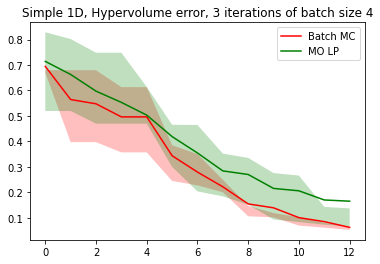

In [4]:
batch_mc_hv_regret = np.array(batch_mc_hv_regret)
mo_lp_hv_regret = np.array(mo_lp_hv_regret)

x = range(config.n_optimization_steps * config.n_query_points + 1)

plt.fill_between(x, np.quantile(batch_mc_hv_regret, q=0.25, axis=0), np.quantile(batch_mc_hv_regret, q=0.75, axis=0), facecolor='r', alpha=0.25)
plt.fill_between(x, np.quantile(mo_lp_hv_regret, q=0.25, axis=0), np.quantile(mo_lp_hv_regret, q=0.75, axis=0), facecolor='g', alpha=0.25)
plt.plot(x, np.mean(batch_mc_hv_regret, axis=0), c='r', label='Batch MC')
plt.plot(x, np.mean(mo_lp_hv_regret, axis=0), c='g', label='MO LP')
plt.title(f"{config.test_function_name}, Hypervolume error, {config.n_optimization_steps} iterations of batch size {config.n_query_points}")
plt.legend()
plt.show()

## 2d input functions from Gardner et al. 2014

In [5]:
config_dict = {
    "test_function_name": test_functions.Gardner2D.name,
    "n_initial_points": 3,
    "n_query_points": 4,
    "n_optimization_steps": 3,
    "n_repeats": 5
}


config_dict["acquisition_method_name"] = "BatchMC"
config = Config.from_dict(config_dict)
batch_mc_hv_regret = single_run(config)


config_dict["acquisition_method_name"] = "DistanceBased"
config = Config.from_dict(config_dict)
mo_lp_hv_regret = single_run(config)

Running BatchMC with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 115.28485870361328s
Running BatchMC with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 66.07420659065247s
Running BatchMC with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 89.57230305671692s
Running BatchMC with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 61.56692028045654s
Running BatchMC with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 79.37093186378479s
Running DistanceBased with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 29.178126096725464s
Running DistanceBased with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 27.615036249160767s
Running DistanceBased with batch size 4 for 3 iterations
Optimization completed without errors
Finished in 27.94109058380127s
Running DistanceBas

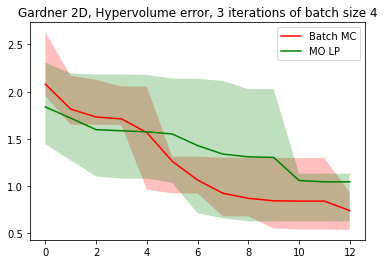

In [6]:
batch_mc_hv_regret = np.array(batch_mc_hv_regret)
mo_lp_hv_regret = np.array(mo_lp_hv_regret)

x = range(config.n_optimization_steps * config.n_query_points + 1)

plt.fill_between(x, np.quantile(batch_mc_hv_regret, q=0.25, axis=0), np.quantile(batch_mc_hv_regret, q=0.75, axis=0), facecolor='r', alpha=0.25)
plt.fill_between(x, np.quantile(mo_lp_hv_regret, q=0.25, axis=0), np.quantile(mo_lp_hv_regret, q=0.75, axis=0), facecolor='g', alpha=0.25)
plt.plot(x, np.mean(batch_mc_hv_regret, axis=0), c='r', label='Batch MC')
plt.plot(x, np.mean(mo_lp_hv_regret, axis=0), c='g', label='MO LP')
plt.title(f"{config.test_function_name}, Hypervolume error, {config.n_optimization_steps} iterations of batch size {config.n_query_points}")
plt.legend()
plt.show()